## PRACTICA 2 - TIV

## Operadores Locales y Detección de Bordes 

In [44]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib ipympl

from PIL import Image

from scipy.ndimage import convolve, correlate, uniform_filter, gaussian_filter, median_filter, rotate
from scipy.ndimage import prewitt, sobel, laplace

from skimage import filters
from skimage.data import camera
from skimage.util import random_noise
from skimage import feature

### 1) Leer y representar la imagen gray_bands.tif 

<class 'str'>
4891973936


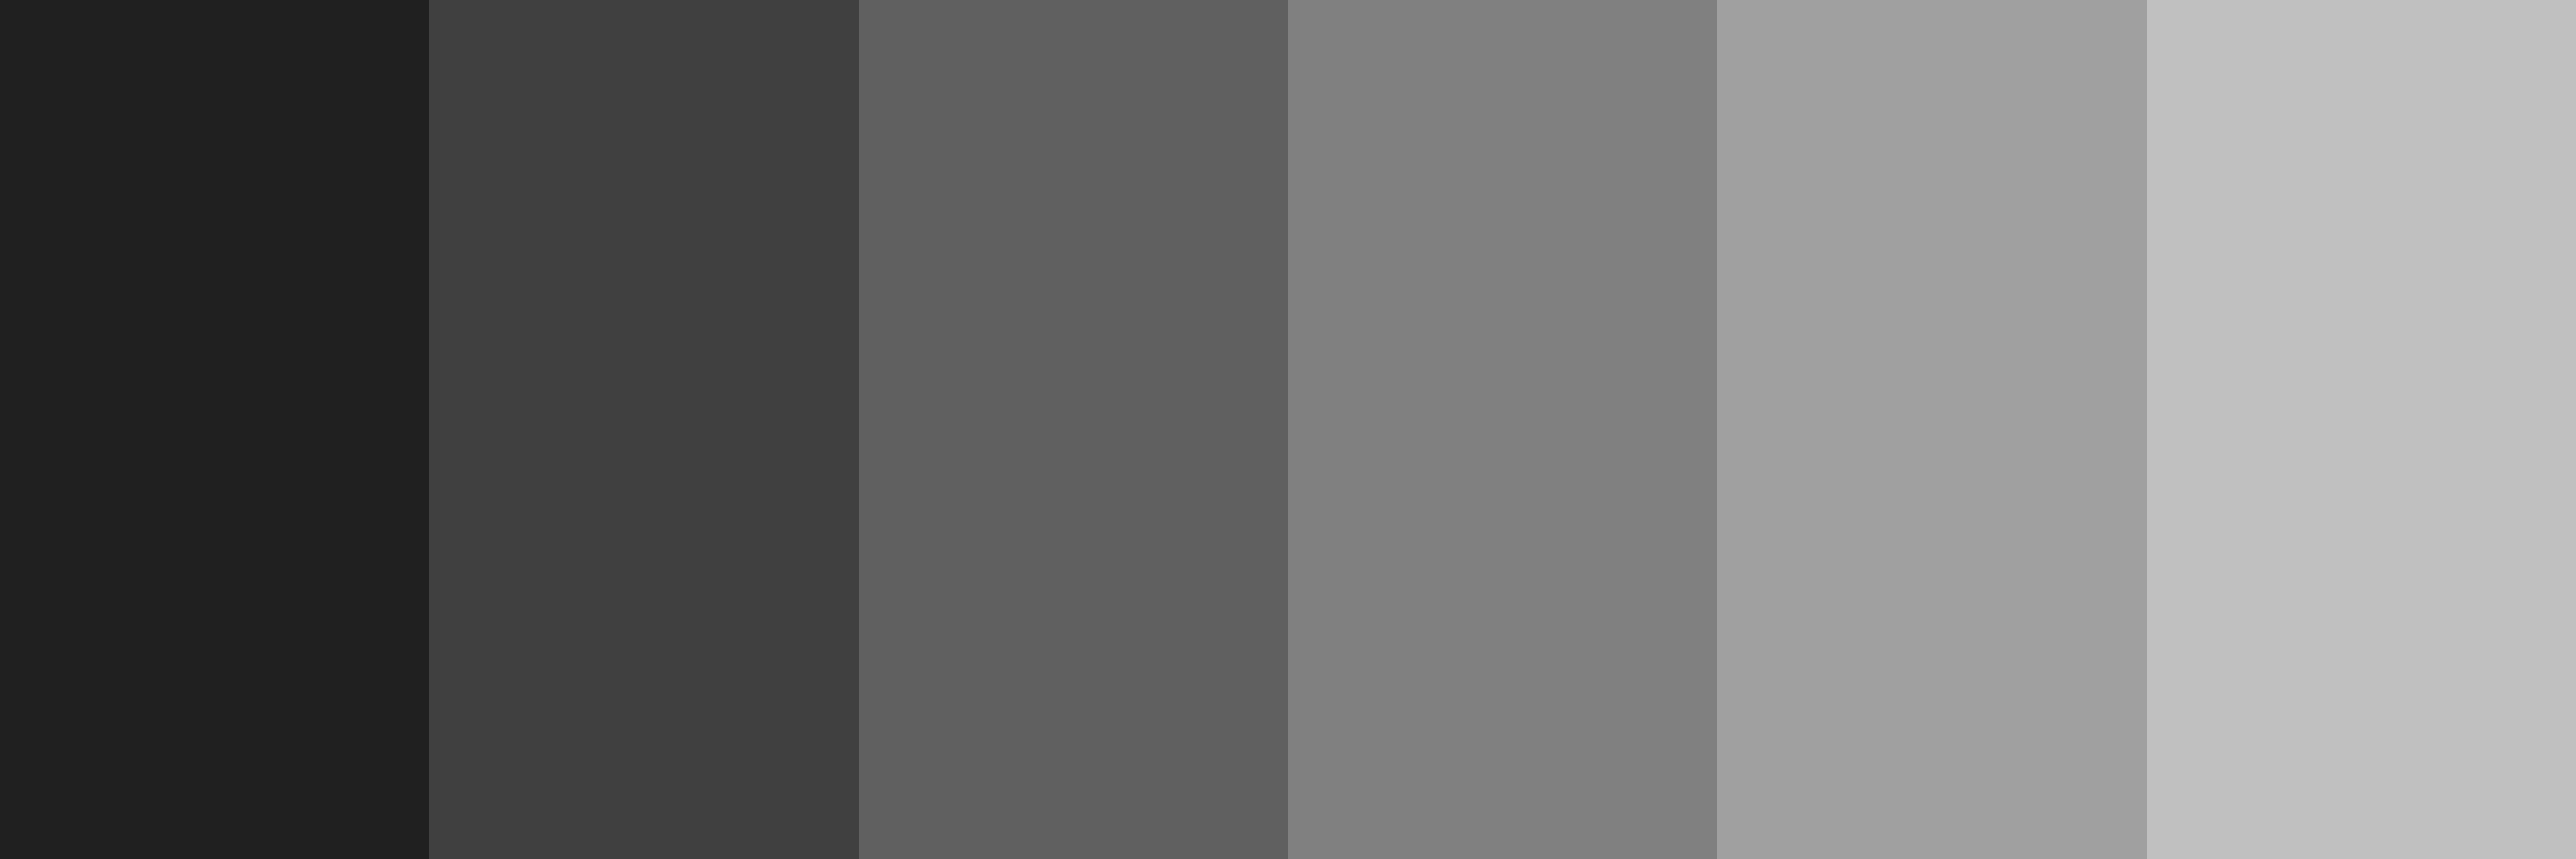

(7200, 2400)


In [45]:
file = 'images/gray_bands.tif'
print(type(file))
print(id(file))
ImgGray = Image.open(file)
display(ImgGray)
print(ImgGray.size)

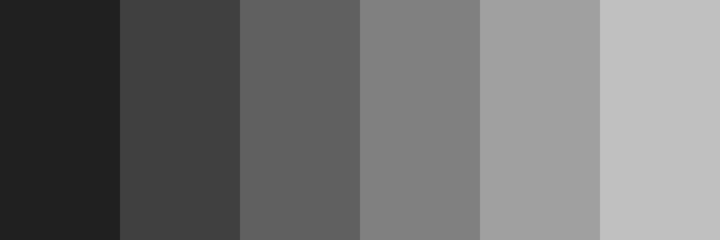

In [46]:
img_final = ImgGray.resize(size=(720,240))
display(img_final)

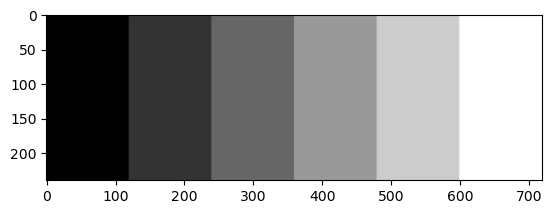

In [110]:
plt.figure()
plt.imshow(img_final , cmap='gray')
img = np.array(img_final , dtype='float') #Convertimos la imagen en Numpy para trabajar mejor con ella
img1 = img /255
#Al dividir ahora, luego hay que tener en cuenta que la desviación típica tendrá que ser menor que 1
#los valores de nuestra imagen están entre 0 y 1

### 2) Detectar y representar los bordes con un operador de gradiente 

In [111]:
gx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # Creamos una matriz gx con valores [-1, 0, 1] repetidos en tres filas.
gy = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])  # Creamos una matriz gy con los valores [-1, -1, -1], [0, 0, 0] y [1, 1, 1] en sus filas.


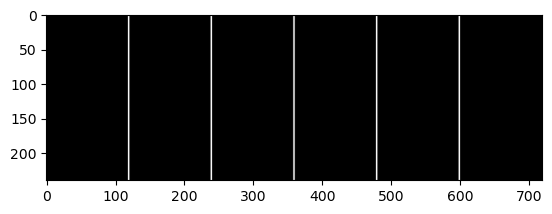

In [112]:
img_gx = convolve(img1, gx)  # Aplicamos la convolución entre la imagen y la matriz gx, y guardamos el resultado en img_gx.
img_gy = convolve(img1, gy)  # Aplicamos la convolución entre la imagen y la matriz gy, y guardamos el resultado en img_gy.
img_prewitt = np.sqrt(img_gx**2 + img_gy**2)  # Calculamos la magnitud del gradiente utilizando los resultados de las convoluciones anteriores.
plt.imshow(img_prewitt/img_prewitt.max(), cmap='gray')  # Mostramos la imagen resultante normalizada en escala de grises.

Text(0.5, 1.0, 'Parcial en y')

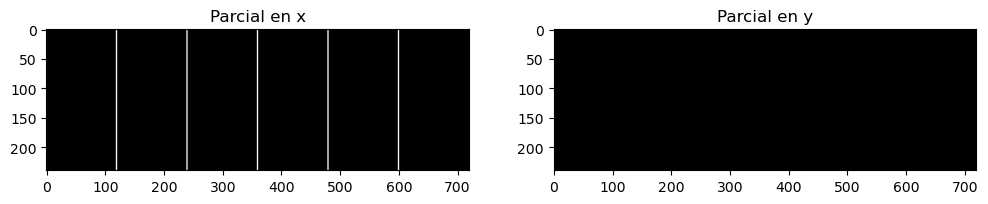

In [113]:
plt.figure(figsize=(12, 6))  # Creamos una figura con un tamaño de 12x6 pulgadas.
plt.subplot(121)  # Creamos un subplot en la posición 1 de una fila y 2 columnas.
plt.imshow(prewitt(img1,1), cmap='gray')  # Mostramos la imagen resultante de aplicar el operador de Prewitt en la dirección x.
plt.title('Parcial en x')  # Establecemos el título del subplot como "Parcial en x".
plt.subplot(122)  # Creamos un subplot en la posición 2 de una fila y 2 columnas.
plt.imshow(prewitt(img1,0), cmap='gray')  # Mostramos la imagen resultante de aplicar el operador de Prewitt en la dirección y.
plt.title('Parcial en y')  # Establecemos el título del subplot como "Parcial en y".

Observamos que en la dimensión Y, el gradiente no logra identificar ningún borde. Esta ausencia de detección se debe a que, en esta instancia, la imagen exhibe variaciones de color exclusivamente en dirección vertical. Por consiguiente, las modificaciones en los tonos de grises se perciben predominantemente a lo largo del eje X.

### 3) Detectar y representar los bordes con el operador de laplaciana 

Ahora procederemos a identificar los bordes utilizando las segundas derivadas laplacianas.

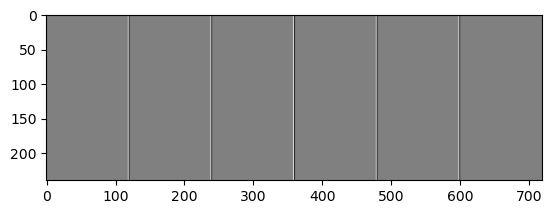

In [114]:
img_lpl = laplace(img1)  # Aplicamos el operador Laplaciano a la imagen y guardamos el resultado en img_lpl.
plt.imshow(img_lpl, cmap='gray')  # Mostramos la imagen resultante utilizando el mapa de colores en escala de grises.

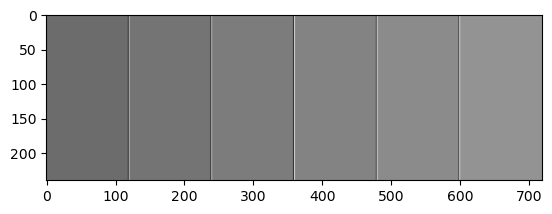

In [115]:
alpha=20#Este valor puede variar entre 0 y 255, así observaremos el efecto
img_realz = img1 - alpha*img_lpl  # Realzamos la imagen restando el producto de alpha y el resultado del operador Laplaciano a la imagen original.
plt.imshow(img_realz, cmap='gray')  # Mostramos la imagen realzada utilizando el mapa de colores en escala de grises.

### 4) Añadir ruido gaussiano a la imagen, de media cero y de desviación típica configurable por el usuario. Representar las imágenes 

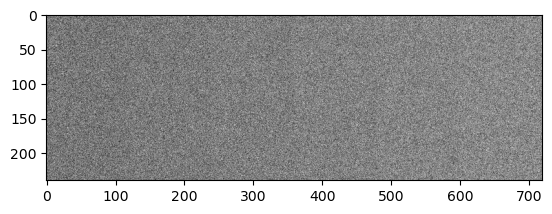

In [116]:
ruido = np.random.normal(0.0, 1, img1.shape)  # Generamos una matriz de ruido aleatorio con la misma forma que la imagen.
imgN = ruido + img1  # Sumamos el ruido generado a la imagen original para obtener una imagen con ruido.
plt.imshow(imgN, cmap='gray')  # Mostramos la imagen resultante con ruido utilizando el mapa de colores en escala de grises.

En esta instancia, opté por asignar un valor de 0.5 a la desviación estándar de la imagen, lo que nos permite visualizar la imagen en tonos de grises de fondo. Observamos que la imagen está afectada por ruido, y si la desviación del ruido fuera incrementada, acercándose a su valor máximo de 1, podríamos notar que la imagen real dejaría de ser perceptible por completo.

### 5) Aplicar los operadores de gradiente y laplaciana a las imágenes ruidosas. ¿Podemos detectar los bordes? Discutir el resultado 

Experimentaremos con la imagen del edificio, la cual presenta una considerable exposición a la luz solar, aplicando los operadores mencionados. Seguiremos el mismo procedimiento que con la imagen anterior, aunque cabe destacar que los bordes en estas imágenes no se encuentran tan nítidamente definidos.

<class 'str'>
4901632352


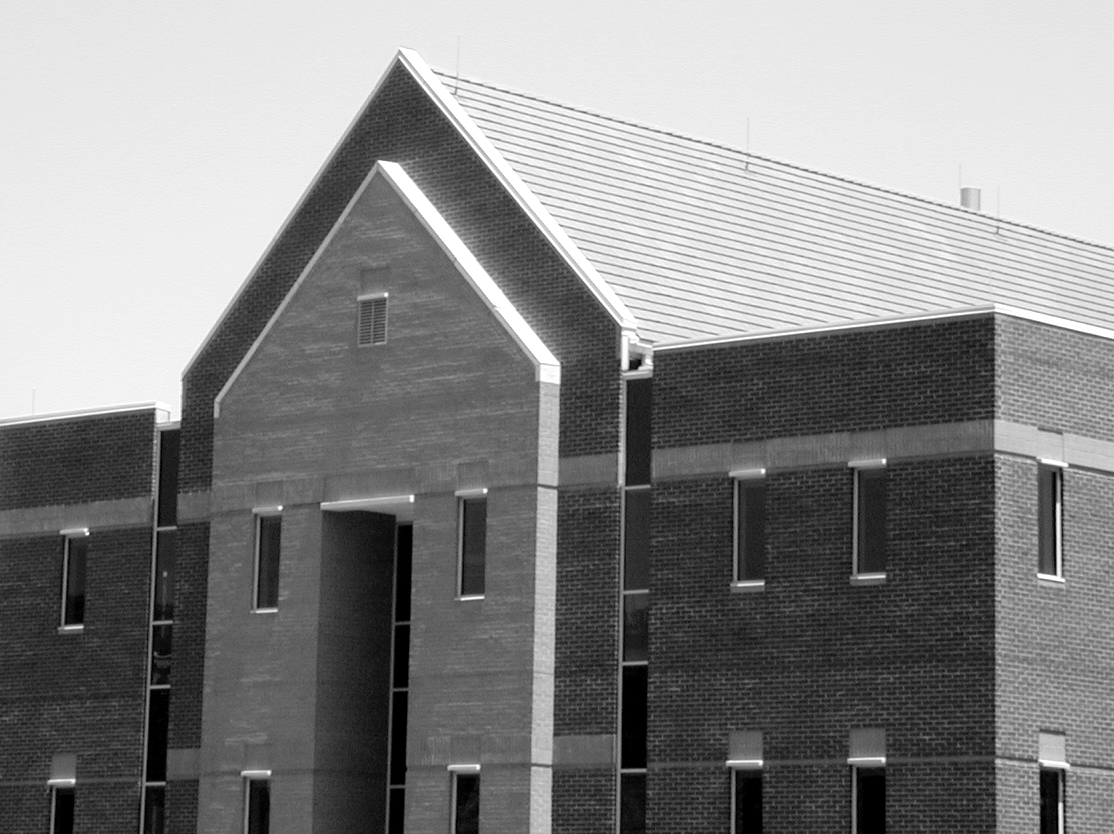

<class 'str'>
4901623552


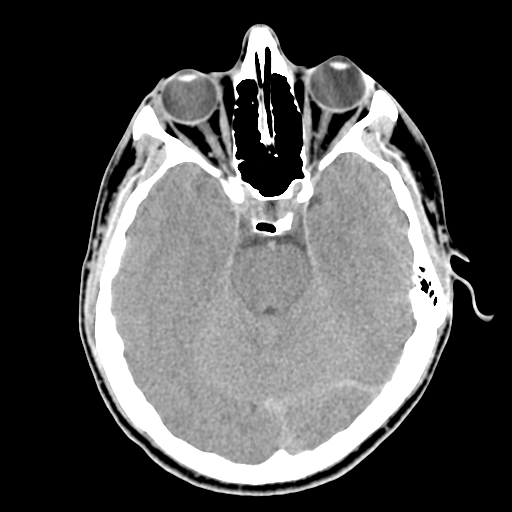

In [87]:
file = 'images/building.tif'
print(type(file))
print(id(file))
ImgBuild = Image.open(file)
display(ImgBuild)
file = 'images/head_CT.tif'
print(type(file))
print(id(file))
ImgCT = Image.open(file)
display(ImgCT)

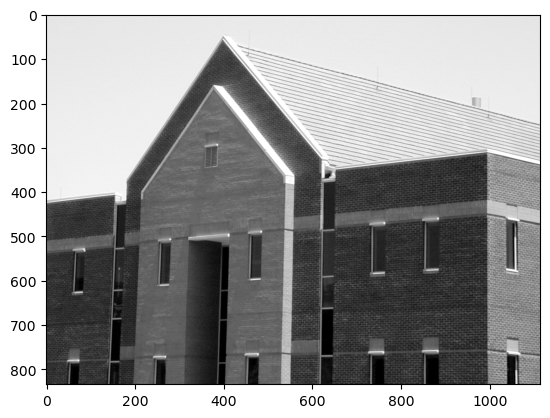

In [117]:
#Convertimos a numpy
plt.figure()
plt.imshow(ImgBuild , cmap='gray')
img = np.array(ImgBuild , dtype='float')
img2 = img /255

A continuación, examinaremos la identificación de bordes, la cual se debe a las variaciones entre formas y tonalidades en la imagen. Emplearemos el operador de gradiente de Prewitt para llevar a cabo este análisis.

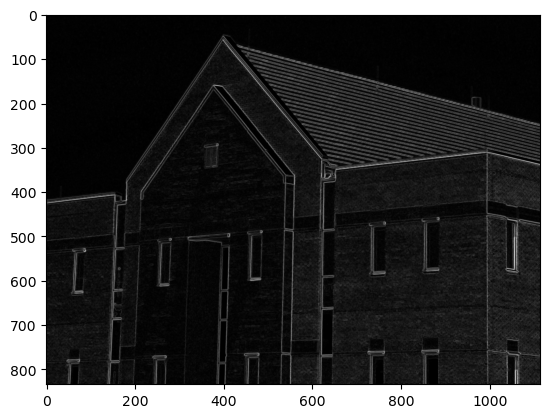

In [118]:
img_gx = convolve(img2, gx)  # Aplicamos la convolución entre la imagen y la matriz gx para obtener el gradiente en la dirección x.
img_gy = convolve(img2, gy)  # Aplicamos la convolución entre la imagen y la matriz gy para obtener el gradiente en la dirección y.
img_prewitt = np.sqrt(img_gx**2 + img_gy**2)  # Calculamos la magnitud del gradiente combinando los gradientes en ambas direcciones.
plt.imshow(img_prewitt/img_prewitt.max(), cmap='gray')  # Mostramos la imagen resultante normalizada en escala de grises.

Text(0.5, 1.0, 'Parcial en y')

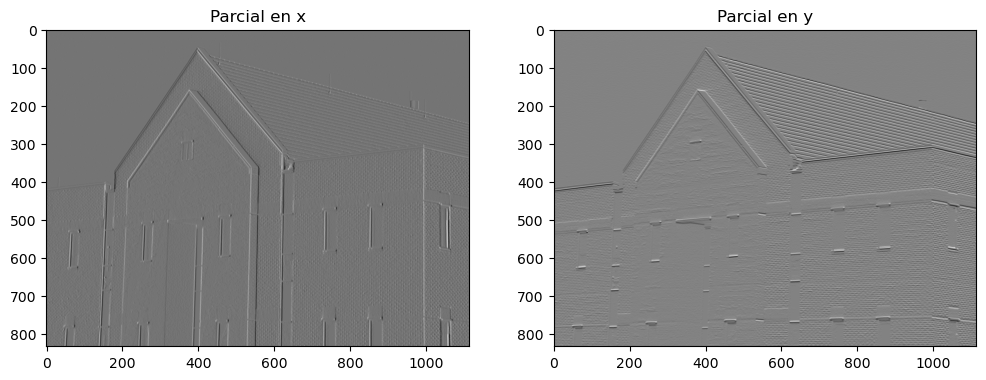

In [119]:
plt.figure(figsize=(12, 6))  # Creamos una figura con un tamaño de 12x6 pulgadas.
plt.subplot(121)  # Creamos un subplot en la posición 1 de una cuadrícula de 1 fila y 2 columnas.
plt.imshow(prewitt(img2,1), cmap='gray')  # Mostramos la imagen resultante al aplicar el operador Prewitt en la dirección x utilizando el mapa de colores en escala de grises.
plt.title('Parcial en x')  # Establecemos el título del subplot como "Parcial en x".
plt.subplot(122)  # Creamos un subplot en la posición 2 de una cuadrícula de 1 fila y 2 columnas.
plt.imshow(prewitt(img2,0), cmap='gray')  # Mostramos la imagen resultante al aplicar el operador Prewitt en la dirección y utilizando el mapa de colores en escala de grises.
plt.title('Parcial en y')  # Establecemos el título del subplot como "Parcial en y".

Ahora contrastemos la identificación de bordes a través de operadores laplacianos.

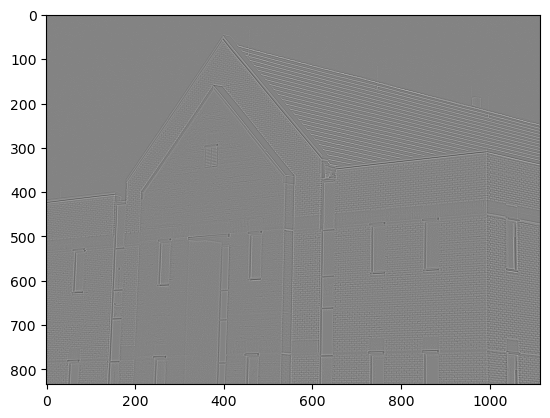

In [120]:
img_lpl = laplace(img2)
plt.imshow(img_lpl, cmap='gray')

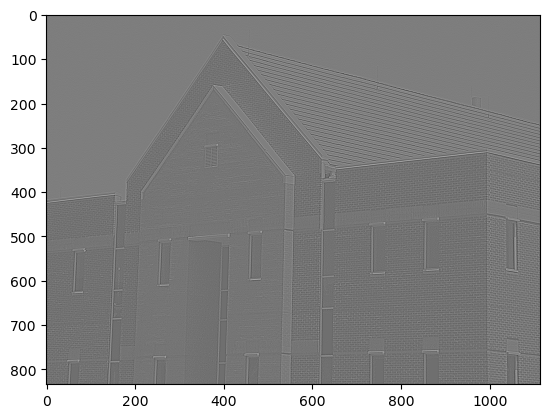

In [121]:
alpha=10 #Este valor puede variar entre 0 y 255, así observaremos el efecto, a mayor nivel de alpha, mayor es el efecto de la difuminación del borde mediante la laplaciana
img_real = img2 - alpha*img_lpl
plt.imshow(img_real, cmap='gray')

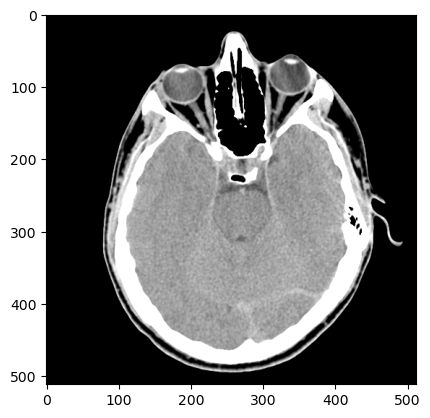

In [122]:
#convertimos a numpy
plt.figure()
plt.imshow(ImgCT , cmap='gray')
img3 = np.array(ImgCT , dtype='float')
img4 = img3 /255

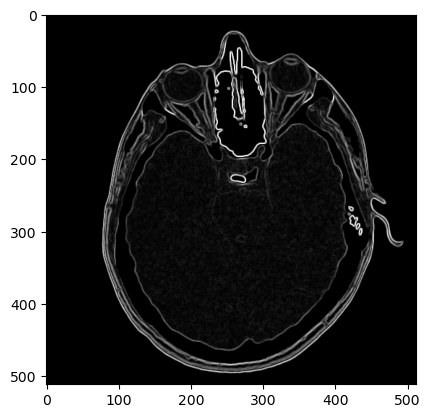

In [123]:
img_gx2 = convolve(img4, gx)
img_gy2 = convolve(img4, gy)
img_prewitt = np.sqrt(img_gx2**2 + img_gy2**2)
plt.imshow(img_prewitt/img_prewitt.max(), cmap='gray')

Text(0.5, 1.0, 'Parcial en y')

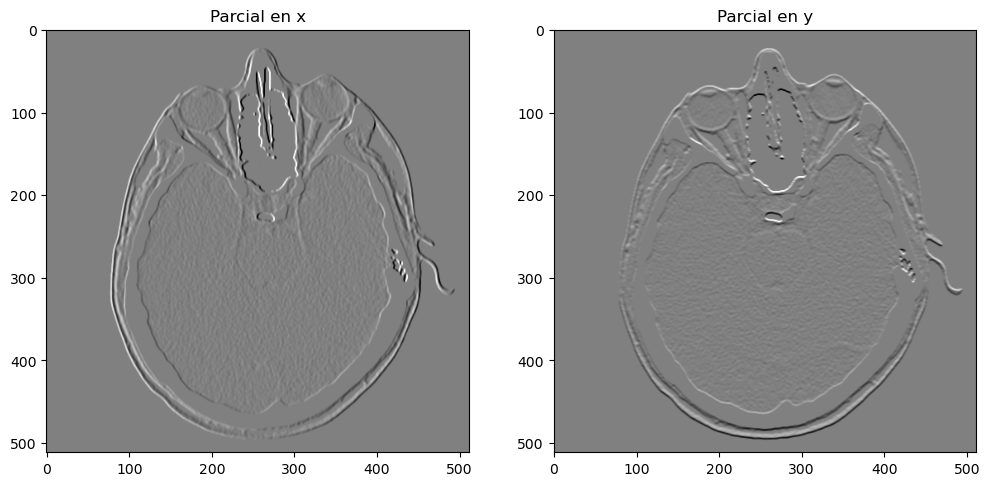

In [124]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(prewitt(img4,1), cmap='gray')
plt.title('Parcial en x')
plt.subplot(122)
plt.imshow(prewitt(img4,0), cmap='gray')
plt.title('Parcial en y')

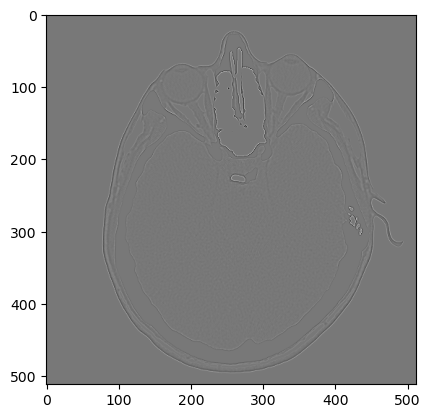

In [125]:
img_lpl2 = laplace(img4)
plt.imshow(img_lpl2, cmap='gray')

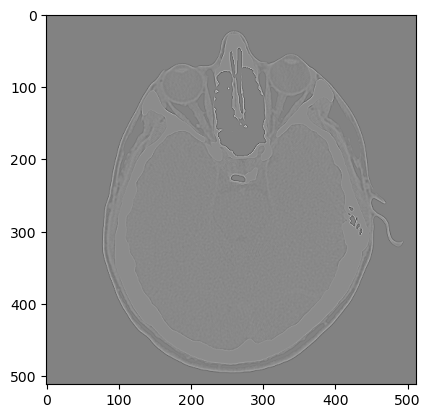

In [126]:
alpha=5 #Este valor puede variar entre 0 y 255, así observaremos el efecto, a mayor nivel de alpha, mayor es el efecto de la difuminación del borde mediante la laplaciana
img_real2 = img4 - alpha*img_lpl2
plt.imshow(img_real2, cmap='gray')

Como se puede notar, la detección de bordes mediante operadores laplacianos en imágenes con mayor cantidad de ruido y cuyos bordes carecen de una definición clara no resulta tan eficiente. Aunque aún podemos distinguir los bordes, no logra proporcionar una separación tan marcada como en el caso de la imagen con bandas de grises.

Por el contrario, el operador de gradiente muestra una mejor capacidad para diferenciar los bordes del edificio y del objeto etiquetado. En ambos casos, los bordes se distinguen mediante un tono más claro, resaltando las fronteras de las figuras presentes en la imagen. Esta disparidad se debe a que la segunda derivada resulta demasiado potente para este tipo de imágenes, ya que el fondo e incluso los elementos de la figura principal se entrelazan en diversos tonos de grises a lo largo de píxeles consecutivos.

### 6) Aplicar un filtrado Gaussiano a la imagen antes de aplicar los operadores anteriores. ¿Podemos ahora detectar los bordes? Discutir el resultado 

Text(0.5, 1.0, 'F. Gaussiano CT - Desviación: 1')

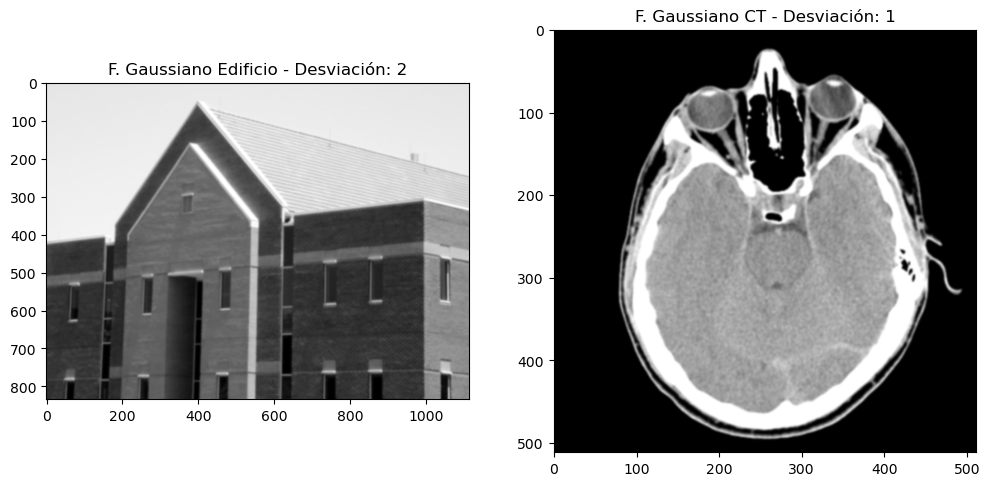

In [127]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
img_gau = gaussian_filter(img2, 2)  # Aplicamos un filtro gaussiano a la imagen con una desviación estándar de 2.
plt.imshow(img_gau, cmap='gray')  # Mostramos la imagen resultante después de aplicar el filtro gaussiano utilizando el mapa de colores en escala de grises.
plt.title('F. Gaussiano Edificio - Desviación: 2')  # Establecemos el título del subplot como "F. Gaussiano Edificio - Desviación: 2".
plt.subplot(122)  # Creamos un subplot en la posición 2 de una cuadrícula de 1 fila y 2 columnas.
img_gau2 = gaussian_filter(img4, 1)  # Aplicamos un filtro gaussiano a la segunda imagen con una desviación estándar de 1.
plt.imshow(img_gau2, cmap='gray')  # Mostramos la imagen resultante después de aplicar el filtro gaussiano utilizando el mapa de colores en escala de grises.
plt.title('F. Gaussiano CT - Desviación: 1')  # Establecemos el título del subplot como "F. Gaussiano CT - Desviación: 1".

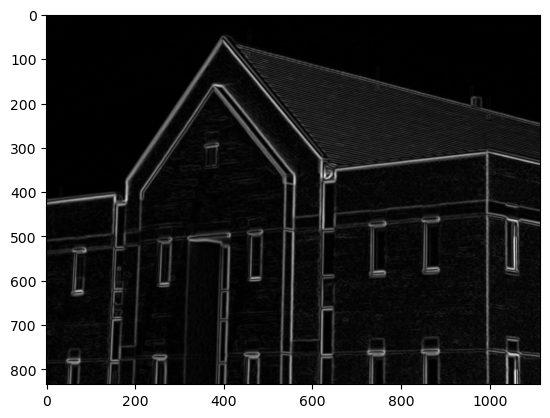

In [128]:
img_gxG = convolve(img_gau, gx)  # Aplicamos la convolución entre la imagen filtrada con el filtro gaussiano y la matriz gx para obtener el gradiente en la dirección x.
img_gyG = convolve(img_gau, gy)  # Aplicamos la convolución entre la imagen filtrada con el filtro gaussiano y la matriz gy para obtener el gradiente en la dirección y.
img_prewitt = np.sqrt(img_gxG**2 + img_gyG**2)  # Calculamos la magnitud del gradiente combinando los gradientes en ambas direcciones.
plt.imshow(img_prewitt/img_prewitt.max(), cmap='gray')  # Mostramos la imagen resultante normalizada en escala de grises.

Text(0.5, 1.0, 'Parcial en y')

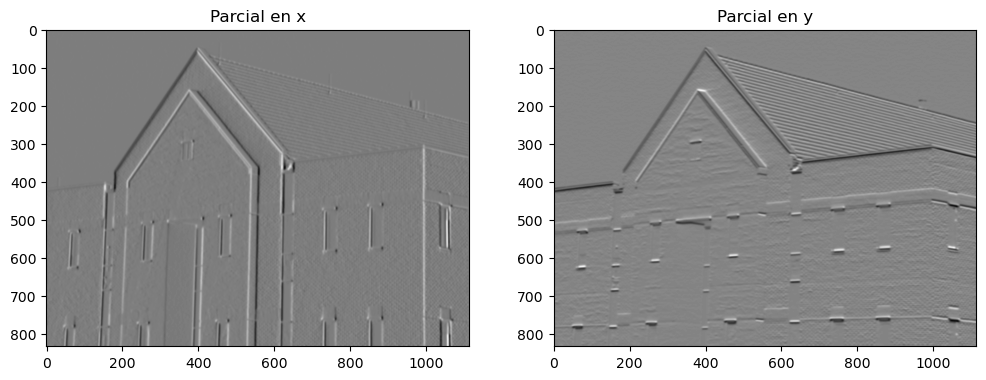

In [129]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(prewitt(img_gau,1), cmap='gray')
plt.title('Parcial en x')
plt.subplot(122)
plt.imshow(prewitt(img_gau,0), cmap='gray')
plt.title('Parcial en y')

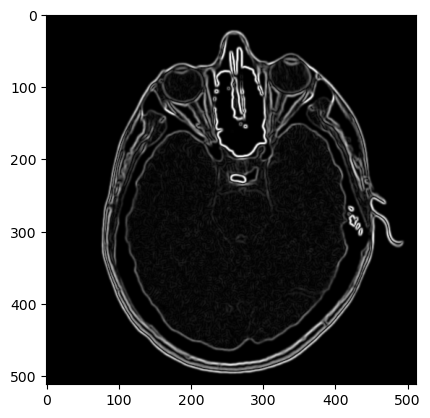

In [130]:
img_gxG2 = convolve(img_gau2, gx)
img_gyG2 = convolve(img_gau2, gy)
img_prewitt = np.sqrt(img_gxG2**2 + img_gyG2**2)
plt.imshow(img_prewitt/img_prewitt.max(), cmap='gray')

Text(0.5, 1.0, 'Parcial en y')

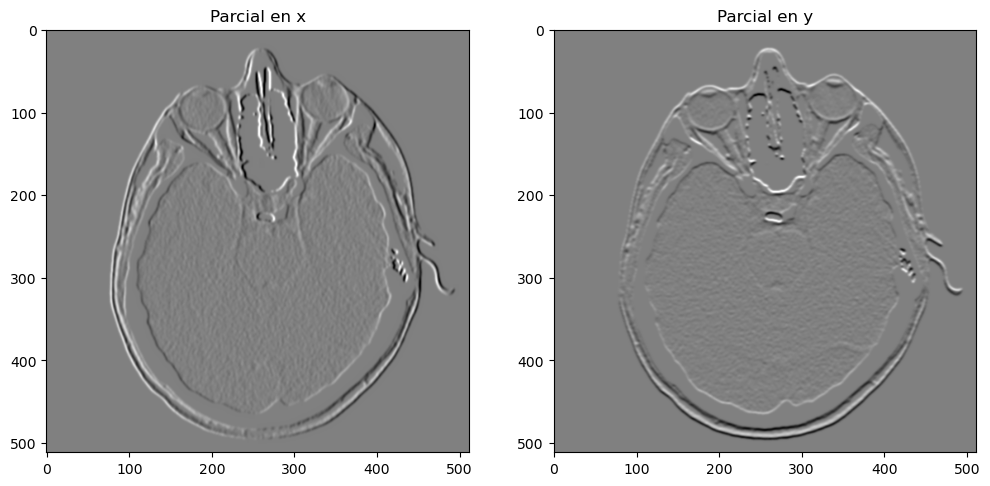

In [131]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(prewitt(img_gau2,1), cmap='gray')
plt.title('Parcial en x')
plt.subplot(122)
plt.imshow(prewitt(img_gau2,0), cmap='gray')
plt.title('Parcial en y')

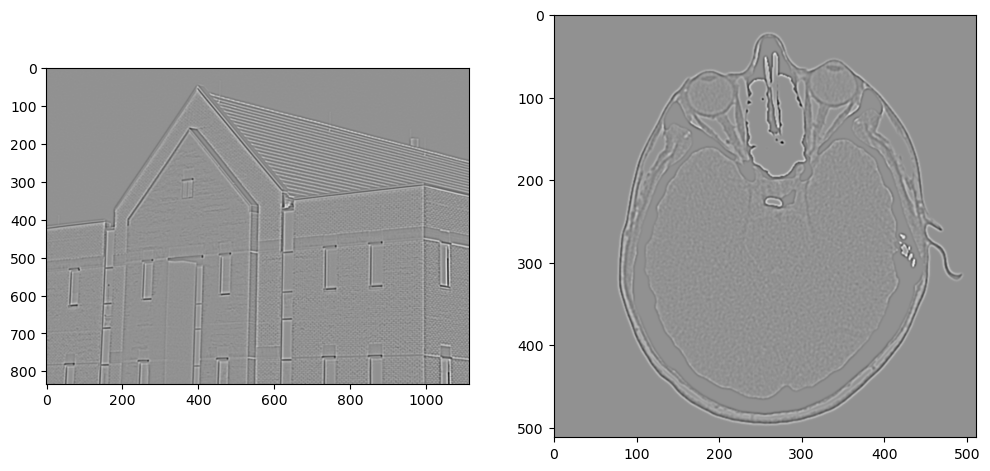

In [132]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
img_lplgau = laplace(img_gau)
plt.imshow(img_lplgau, cmap='gray')
plt.subplot(122)
img_lplgau2 = laplace(img_gau2)
plt.imshow(img_lplgau2, cmap='gray')

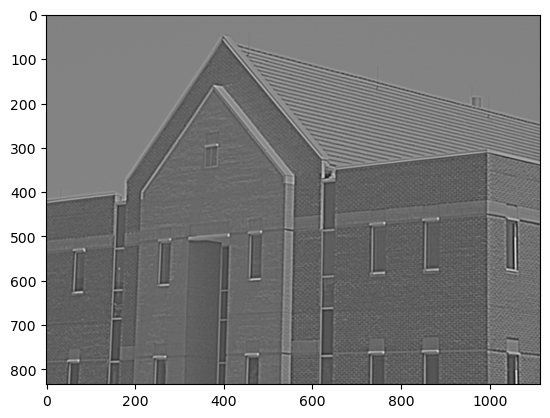

In [133]:
alpha=30 #Este valor puede variar entre 0 y 255, así observaremos el efecto, a mayor nivel de alpha, mayor es el efecto de la difuminación del borde mediante la laplaciana
img_realgau = img_gau - alpha*img_lplgau
plt.imshow(img_realgau, cmap='gray')

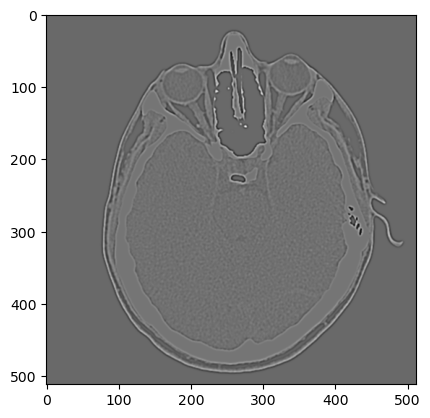

In [134]:
alpha=20 #Este valor puede variar entre 0 y 255, así observaremos el efecto, a mayor nivel de alpha,mayor es el efecto de la difuminación del borde mediante la laplaciana
img_realgau2 = img_gau2 - alpha*img_lplgau2
plt.imshow(img_realgau2, cmap='gray')

Al emplear un filtro gaussiano en imágenes con mayor presencia de ruido, el propio filtro se encarga de suprimir el ruido presente en aquellas imágenes que, como en este ejemplo, carecen de tonos de blanco y negro claramente definidos. En consecuencia, en esta situación, ambos operadores cumplen con su función de manera efectiva, y podemos apreciar de manera más evidente la transformación al comparar las cuatro imágenes posteriormente.

Además, es importante destacar que al aplicar un filtro gaussiano, no solo se logra la supresión del ruido, sino que también se suaviza la imagen, lo que puede resultar beneficioso en casos donde la nitidez no es crítica. Este suavizado puede ayudar a resaltar características más importantes y reducir detalles innecesarios.

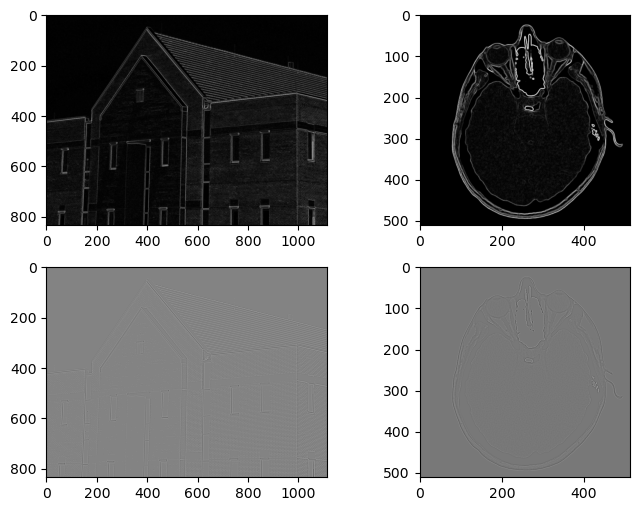

In [135]:
#Imágenes SIN Filtro Gaussiano Previo
plt.figure(figsize=(8, 6))
plt.subplot(221)
img_prewitt = np.sqrt(img_gx**2 + img_gy**2)
plt.imshow(img_prewitt/img_prewitt.max(), cmap='gray')
plt.subplot(222)
img_prewitt = np.sqrt(img_gx2**2 + img_gy2**2)
plt.imshow(img_prewitt/img_prewitt.max(), cmap='gray')
plt.subplot(223)
img_lpl = laplace(img2)
plt.imshow(img_lpl, cmap='gray')
plt.subplot(224)
img_lpl2 = laplace(img4)
plt.imshow(img_lpl2, cmap='gray')

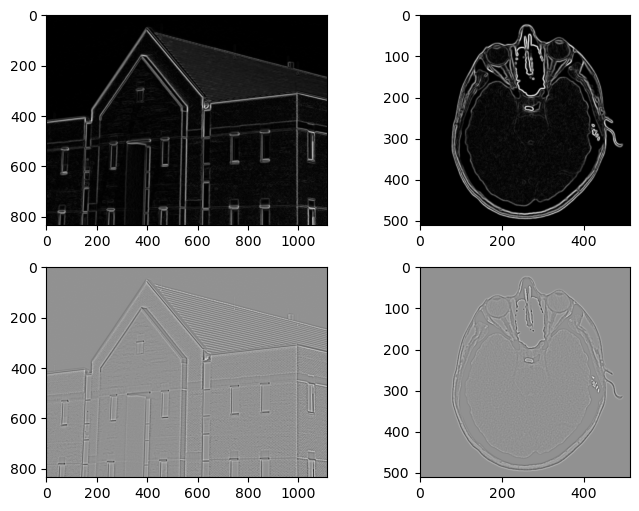

In [136]:
#Imágenes CON Filtro Gaussiano Previo
plt.figure(figsize=(8, 6))
plt.subplot(221)
img_prewitt = np.sqrt(img_gxG**2 + img_gyG**2)
plt.imshow(img_prewitt/img_prewitt.max(), cmap='gray')
plt.subplot(222)
img_prewitt = np.sqrt(img_gxG2**2 + img_gyG2**2)
plt.imshow(img_prewitt/img_prewitt.max(), cmap='gray')
plt.subplot(223)
img_lplgau = laplace(img_gau)
plt.imshow(img_lplgau, cmap='gray')
plt.subplot(224)
img_lplgau2 = laplace(img_gau2)
plt.imshow(img_lplgau2, cmap='gray')

### 7) La detección de bordes se resuelve con métodos que se fundamentan en lo visto en los apartados anteriores. Un algoritmo muy conocido es el detector de Canny, que se ha presentado en clase. Aplicarlo a las dos imágenes reales (building.tif y head_CT.tif). Discutir el resultado y los parámetros empleados 

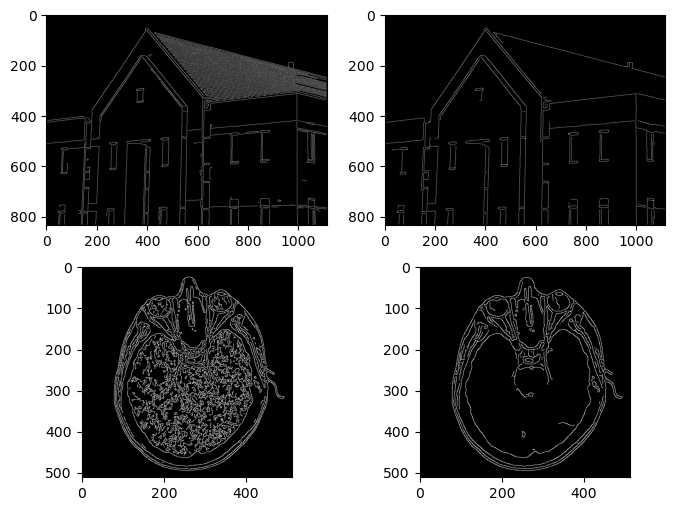

In [137]:
ImgBuild = Image.open('images/building.tif')  # Abrimos la imagen "building.tif".
ImgBuild = np.array(ImgBuild, dtype='uint8')  # Convertimos la imagen en un arreglo NumPy de tipo 'uint8'.
edges1 = feature.canny(ImgBuild, sigma=2)  # Aplicamos el algoritmo Canny a la imagen con un valor de sigma de 2 para detectar los bordes.
edges2 = feature.canny(ImgBuild, sigma=3)  # Aplicamos el algoritmo Canny a la imagen con un valor de sigma de 3 para detectar los bordes.
ImgCT = Image.open('images/head_CT.tif')  # Abrimos la imagen "head_CT.tif".
ImgCT = np.array(ImgCT, dtype='uint8')  # Convertimos la imagen en un arreglo NumPy de tipo 'uint8'.
edges3 = feature.canny(ImgCT, sigma=1)  # Aplicamos el algoritmo Canny a la imagen con un valor de sigma de 1 para detectar los bordes.
edges4 = feature.canny(ImgCT, sigma=1.9)  # Aplicamos el algoritmo Canny a la imagen con un valor de sigma de 1.9 para detectar los bordes.

plt.figure(figsize=(8, 6))  # Creamos una figura con un tamaño de 8x6 pulgadas.
plt.subplot(221)  # Creamos un subplot en la posición 1 de una cuadrícula de 2 filas y 2 columnas.
plt.imshow(edges1, cmap='gray')  # Mostramos la imagen resultante de los bordes detectados utilizando el mapa de colores en escala de grises.
plt.subplot(222)  # Creamos un subplot en la posición 2 de una cuadrícula de 2 filas y 2 columnas.
plt.imshow(edges2, cmap='gray')  # Mostramos la imagen resultante de los bordes detectados utilizando el mapa de colores en escala de grises.
plt.subplot(223)  # Creamos un subplot en la posición 3 de una cuadrícula de 2 filas y 2 columnas.
plt.imshow(edges3, cmap='gray')  # Mostramos la imagen resultante de los bordes detectados utilizando el mapa de colores en escala de grises.
plt.subplot(224)  # Creamos un subplot en la posición 4 de una cuadrícula de 2 filas y 2 columnas.
plt.imshow(edges4, cmap='gray')  # Mostramos la imagen resultante de los bordes detectados utilizando el mapa de colores en escala de grises.


Mediante este método de detección proporcionado por skimage, el objetivo sigue siendo el mismo que con los operadores previos: destacar los bordes de las imágenes. En este enfoque, a medida que aumenta el valor de sigma, los bordes que configuran la silueta principal de la imagen emergen con niveles de relevancia variables.

Observamos que cuando el valor de sigma supera 2, los bordes de los objetos más pequeños en la imagen tienden a desvanecerse. Para optimizar la eficacia de este método de detección, es recomendable combinarlo con el método de Sobel.

Además, es importante señalar que este método permite modular la sensibilidad de la detección de bordes ajustando el parámetro sigma, lo que proporciona flexibilidad en la adaptación a diferentes características y escalas de la imagen.